In [6]:
import pandas as pd
import requests
from io import StringIO
import certifi
import matplotlib.pyplot as plt

## 1. Load OWID COVID-19 Dataset

We load the latest cleaned dataset from Our World in Data (OWID) and run basic exploratory checks:

- number of rows and columns

- column types and missing values

- distribution of daily cases, deaths, and vaccinations over time

- overview of countries and global trends

In [46]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Use certifi to verify SSL
r = requests.get(url, verify=certifi.where())
csv_data = StringIO(r.text)

df = pd.read_csv(csv_data)


In [45]:
print(f"Dataset shape: {df.shape}")
print("\nColumn types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())

# Top 5 rows
df.head()

Dataset shape: (429435, 67)

Column types:
 iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                          int64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

Missing values per column:
 iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
             

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


## 2. Inspect Dataset Structure and Missing Values
Before diving into analysis, we check the structure of the dataset:
- **Shape**: number of rows and columns, to understand dataset size
- **Columns**: the variables included, such as cases, deaths, tests, vaccinations, and location information
- **Missing values**: percentage of missing data per column, to identify gaps and potential preprocessing needs

In [5]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values (%):\n", df.isna().mean().round(3)*100)

Shape: (429435, 67)

Columns:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_v

## 3. Filter Only Real Countries
OWID’s dataset contains entries for aggregates like “World”, continents, and regions, which have ISO codes longer or shorter than three letters.
To focus our analysis on actual countries, we filter rows where the ISO code has exactly 3 characters:

In [8]:
countries = df[df["iso_code"].str.len() == 3]

## 4. Compare Selected Countries
To understand how COVID-19 affected different European countries, we select a subset of countries and compare their daily deaths per million:
- **Subset**: Portugal, Spain, Italy, Germany
- **Metric**: new_deaths_per_million to account for population differences
- **Smoothing**: 7-day rolling average to reduce daily fluctuations

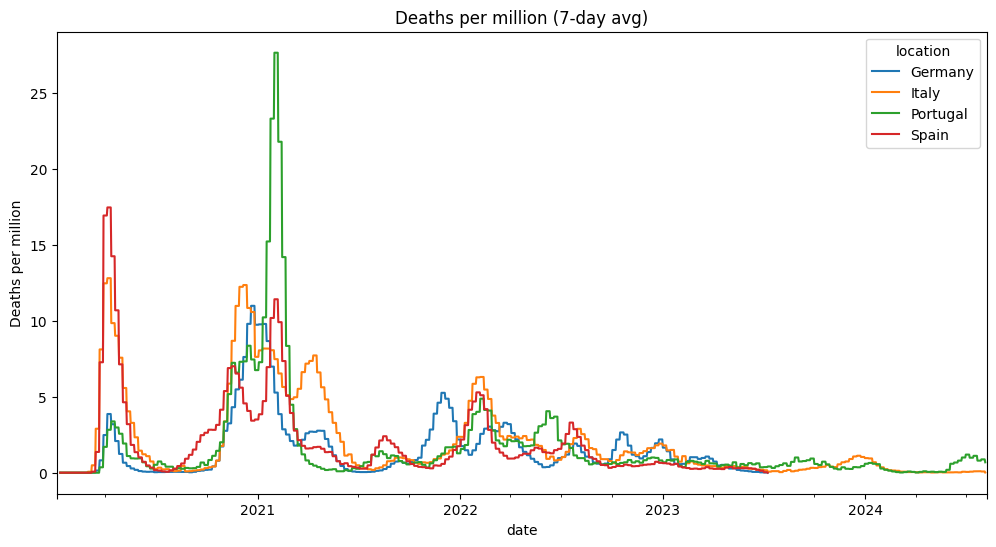

In [9]:
compare = ["Portugal", "Spain", "Italy", "Germany"]

subset = countries[countries["location"].isin(compare)]

pivot = subset.pivot(index="date",
                     columns="location",
                     values="new_deaths_per_million").rolling(7).mean()

pivot.plot(figsize=(12,6), title="Deaths per million (7-day avg)")
plt.ylabel("Deaths per million")
plt.show()


## 5. Analyze Portugal COVID-19 Trends
We focus on Portugal to explore detailed country-level trends over time. This includes:
- **Daily new cases and deaths** (smoothed with a 7-day rolling average)
- **Case Fatality Ratio (CFR)** to measure mortality
- **Test positivity rate** to assess testing coverage

In [19]:
country = "Portugal"
pt = countries[countries["location"] == country].copy()

pt[["date", "new_cases", "new_deaths"]].tail()

,date,new_cases,new_deaths
309382,2024-07-31,0.0,0.0
309383,2024-08-01,0.0,0.0
309384,2024-08-02,0.0,0.0
309385,2024-08-03,0.0,0.0
309386,2024-08-04,1055.0,50.0


Plot daily new cases & deaths

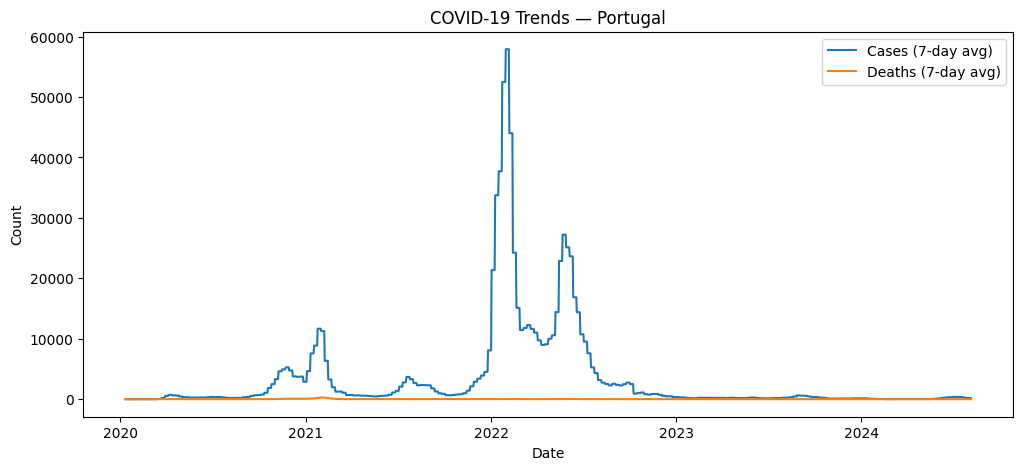

In [20]:
plt.figure(figsize=(12,5))
plt.plot(pt["date"], pt["new_cases"].rolling(7).mean(), label="Cases (7-day avg)")
plt.plot(pt["date"], pt["new_deaths"].rolling(7).mean(), label="Deaths (7-day avg)")
plt.title(f"COVID-19 Trends — {country}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

Compute Case Fatality Ratio (CFR)

Measure the severity of the disease as a fraction of deaths over confirmed cases.

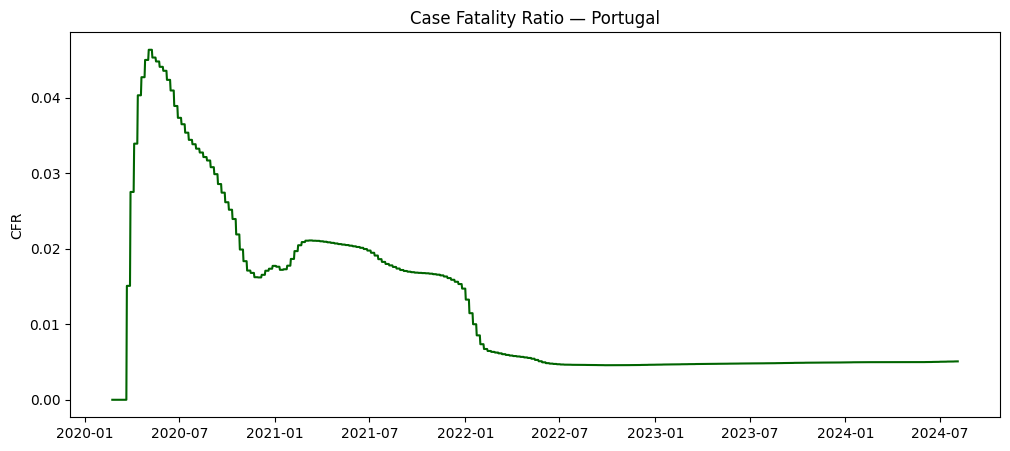

In [43]:
pt["cfr"] = pt["total_deaths"] / pt["total_cases"]

plt.figure(figsize=(12,5))
plt.plot(pt["date"], pt["cfr"], color ='darkgreen')
plt.title(f"Case Fatality Ratio — {country}")
plt.ylabel("CFR")
plt.show()


Testing & positivity

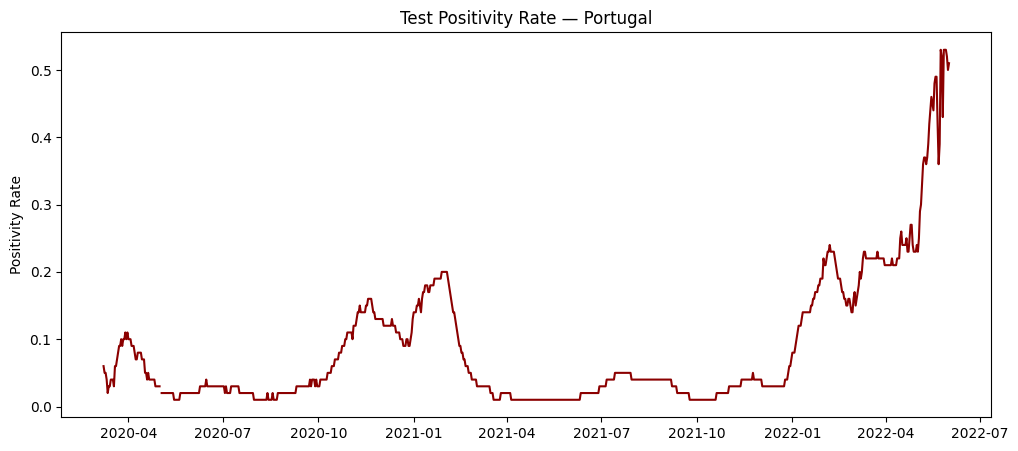

In [42]:
plt.figure(figsize=(12,5))
plt.plot(pt["date"], pt["positive_rate"], color = 'darkred')
plt.title(f"Test Positivity Rate — {country}")
plt.ylabel("Positivity Rate")
plt.show()


## 6. Latest COVID-19 Summary by Country
To get a current snapshot of the pandemic across countries, we select the most recent data for each country and examine key indicators:
- **Total cases per million** – shows the overall infection burden relative to population
- **Total deaths per million** – indicates mortality impact
- **People fully vaccinated per hundred** – measures vaccine coverage

This summary allows comparison of severity, mortality, and vaccine coverage across countries, giving a clear view of the global situation as of the latest available date.

In [24]:
latest = countries.sort_values("date").groupby("location").tail(1)

summary = latest[[
    "location",
    "total_cases_per_million",
    "total_deaths_per_million",
    "people_fully_vaccinated_per_hundred"
]].sort_values("total_deaths_per_million", ascending=False)

summary.head(10)


,location,total_cases_per_million,total_deaths_per_million,people_fully_vaccinated_per_hundred
302690,Peru,135232.81,6601.11,NaN
56929,Bulgaria,194845.40,5669.61,NaN
282206,North Macedonia,190695.11,5422.13,NaN
48559,Bosnia and Herzegovina,125956.49,5114.82,NaN
171874,Hungary,230352.08,5065.21,NaN
87061,Croatia,337121.47,4799.55,NaN
352541,Slovenia,641340.20,4766.86,NaN
140410,Georgia,491099.22,4519.36,NaN
253741,Montenegro,408818.03,4317.90,NaN
248719,Moldova,209711.42,4027.98,NaN


## 7. Global COVID-19 Trends
To understand the overall trajectory of the pandemic worldwide, we examine the global daily new cases.
- **Metric**: new_cases
- **Smoothing**: 7-day rolling average to reduce daily fluctuations

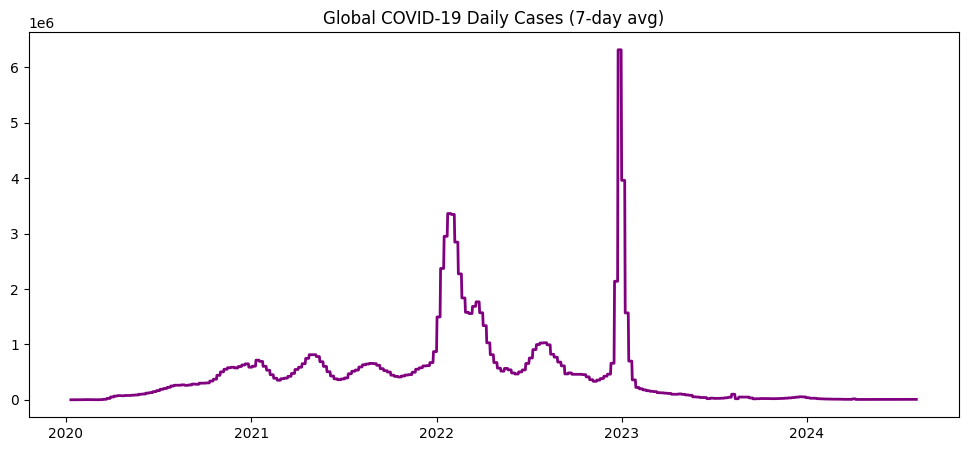

In [27]:
world = df[df["location"]=="World"]

plt.figure(figsize=(12,5))
plt.plot(world["date"], world["new_cases"].rolling(7).mean(), color="purple", linewidth=2, linestyle='-')
plt.title("Global COVID-19 Daily Cases (7-day avg)")
plt.show()
